# Прогнозирование оттока абонентов из компании, предоставляющей телекоммуникационные услуги

<img src='mob.jpg' style='width:500px;height:350px'/>

Компания "Тралала" в день знаний, решила в очередной раз провести проверку на их наличие. И поручила одному из своих работников - провести анализ некоторого данного датасета, который подразумевает статистику оттока абонентов из одной комании оказывающую теле-услугу в другую, создать подходящую моделей классификации, дабы спрогнозировать, может ли уйти клиент, и вслучае предложить ему взаимовыгодные условия.

### Импортируем необходимые библиотеки и загружаем данные

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, plot_confusion_matrix, f1_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline


warnings.filterwarnings("ignore")

### Общая информация о данных в работе и анализ

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
len(df)

7032

Общие характеристики данных


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


df — результат запроса. В нём содержится следующая информация:

`customerID` - Колонка с id клиента

`gender` - Пол клиента

`SeniorCitizen` - Является ли клиент человеком пожилого возраста

`Partner` - Является ли клиентом в данных момент

`Dependents` - Является ли зависимым клиентом

`tenure` - Сколько является/являлся клиентом

`PhoneService` - Телефонная служба

`MultipleLines` - Мультилинии

`InternetService` - Интернет сервис

`OnlineSecurity` - Онлайн безопасность

`OnlineBackup` - Резервное копирование онлайн

`DeviceProtection` - Защита устройства

`TechSupport` - Техническая поддержка

`StreamingTV` - Потоковое телевидение

`StreamingMovies` - Потоковые фильмы

`Contract` - Вид контракта

`PaperlessBilling` - Безбумажные счета

`PaymentMethod` - Способ оплаты

`MonthlyCharges` - Ежемесячная плата

`TotalCharges` - Общие расходы

`Churn` - Ушел ли клиент в отток



In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Nan значения не обнаружены. Типы данных не требуют преобразований. По некоторым колонкам можно уменьшить занимаему память.

In [9]:
df = df.astype({'SeniorCitizen': 'int16', 
                             'tenure': 'int16', 
                             'MonthlyCharges': 'float16', 
                             'TotalCharges': 'float16'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int16  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int16  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Незначительно уменьшили занимаемую память, можем переходить к исследованию данных

## Исследование данных 


Построим график для проверки сбалансированности значений колонки с классами Churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

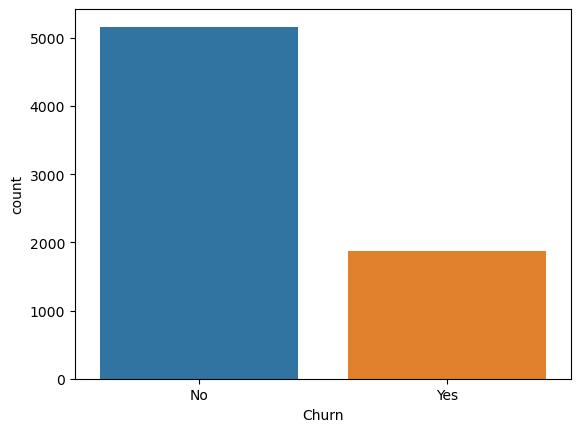

In [10]:
sns.countplot(data=df, x='Churn')

Видим что классы немного не сбалансированы, будем это иметь ввиду.

---
Посмотрим на распределение колонки TotalCharges по различным категориям Churn

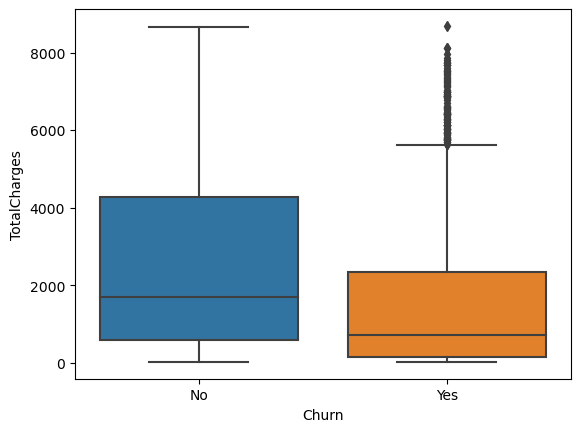

In [11]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.show()

Теперь посмотрим на график с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

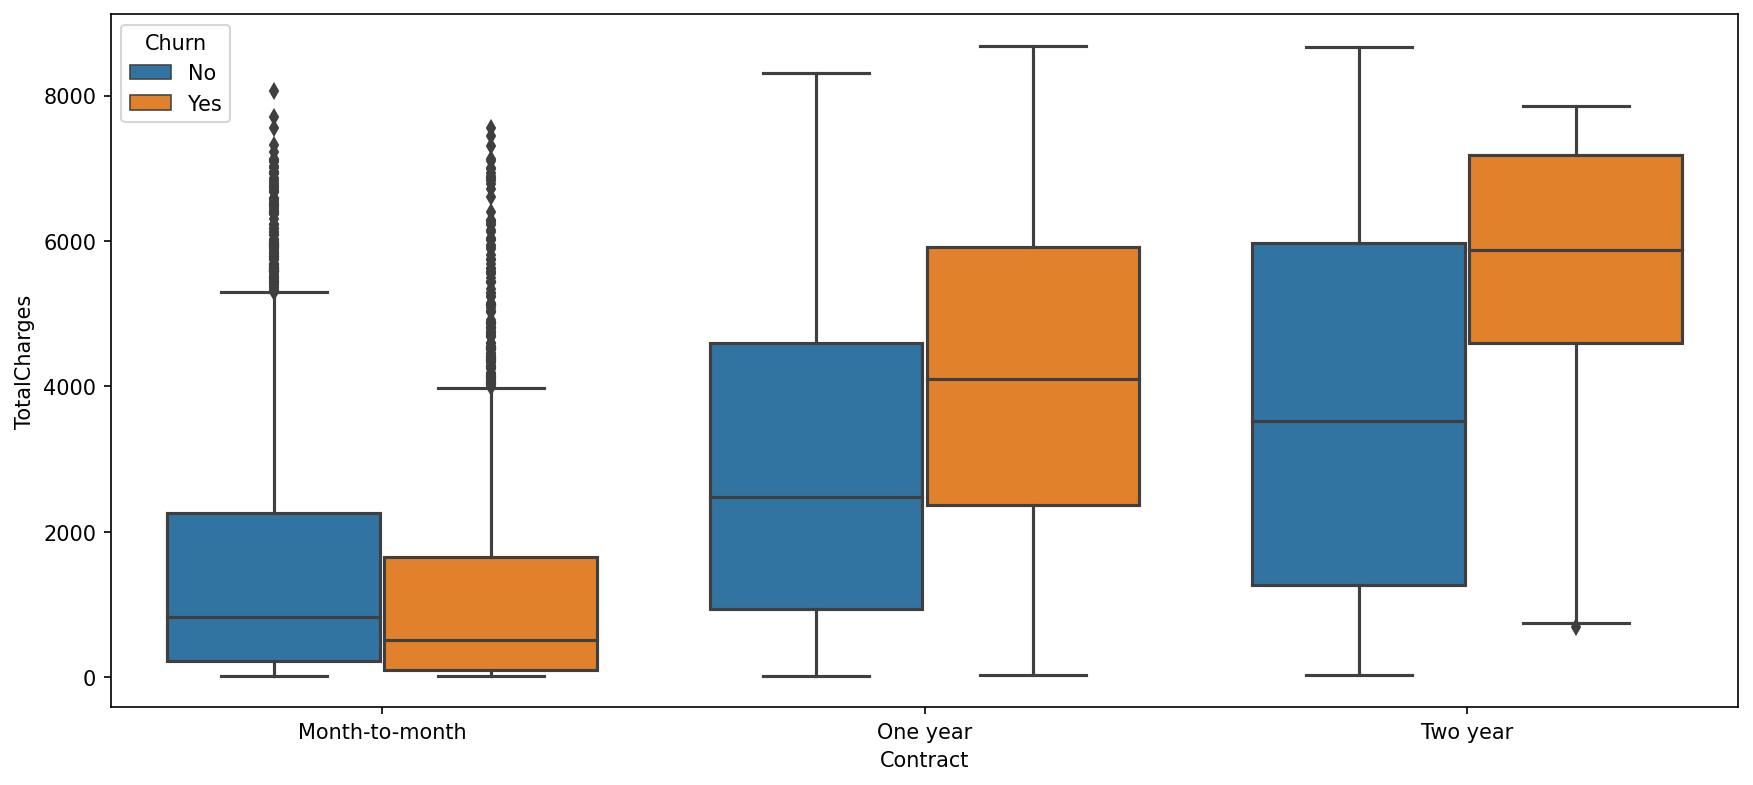

In [12]:
plt.figure(figsize=(14, 6), dpi=150)
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')

На графике контракта `Month-to-month` распределение Churn примерно одинаково. В годовых контрактрах приблизительно имеется такая же ситуация с распределением тех, кто поменял команию, а кто остался. А для двухлетних контрактов видимое меньшее количество людей уходящих в отток. По графику можно предположить, что на годовых контрактах и более, в отток уходят люди, которые платили за услуги больше.

---


# Анализ оттока


Перечислим типы контрактов.

In [13]:
df['Contract'].unique()


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Создадим график с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании

<AxesSubplot:xlabel='tenure', ylabel='Count'>

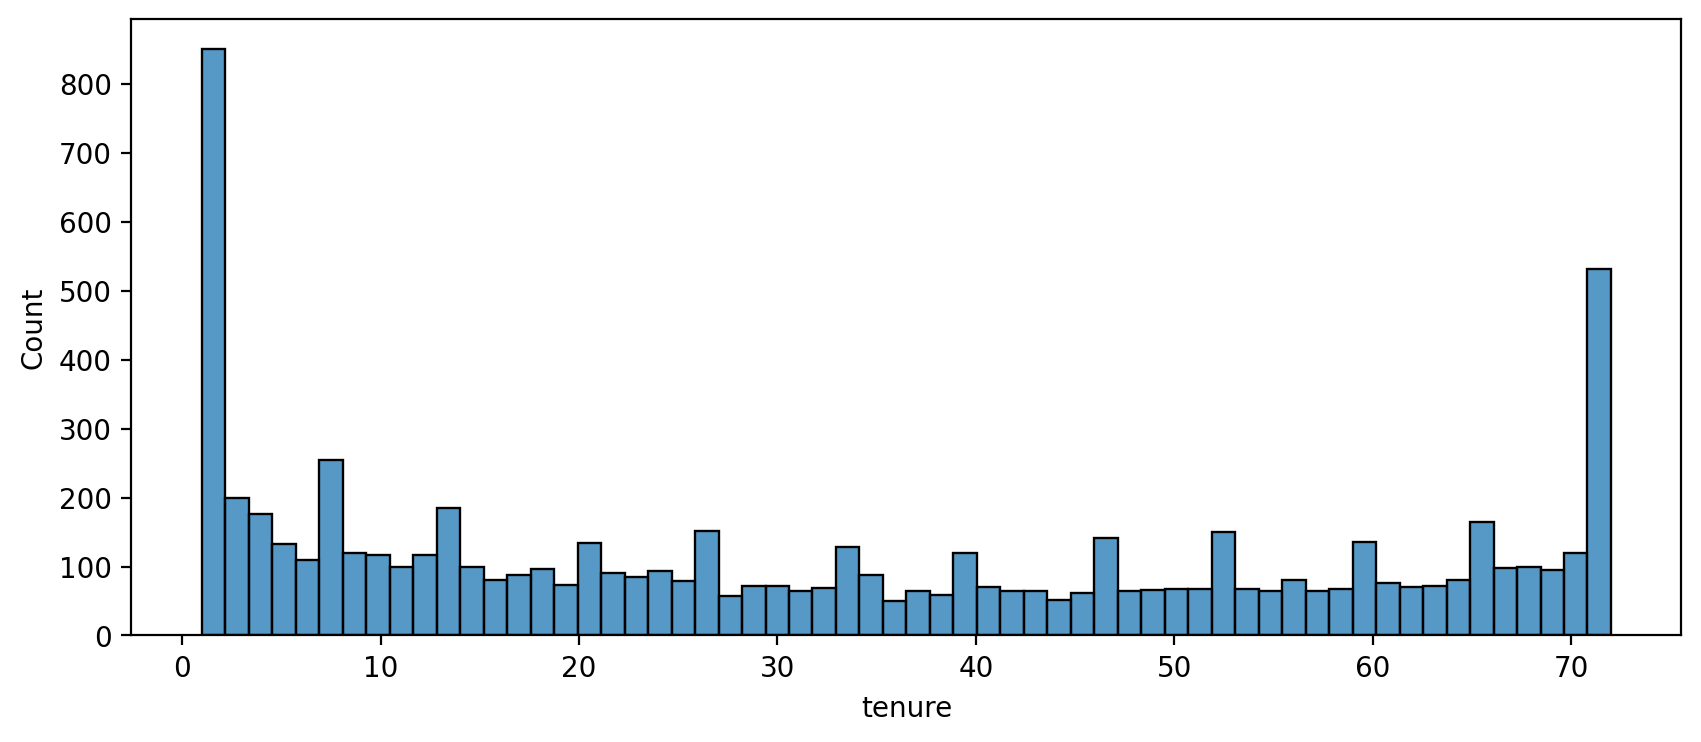

In [14]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df, x='tenure', bins=60)

Теперь постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract

<Figure size 2000x600 with 0 Axes>

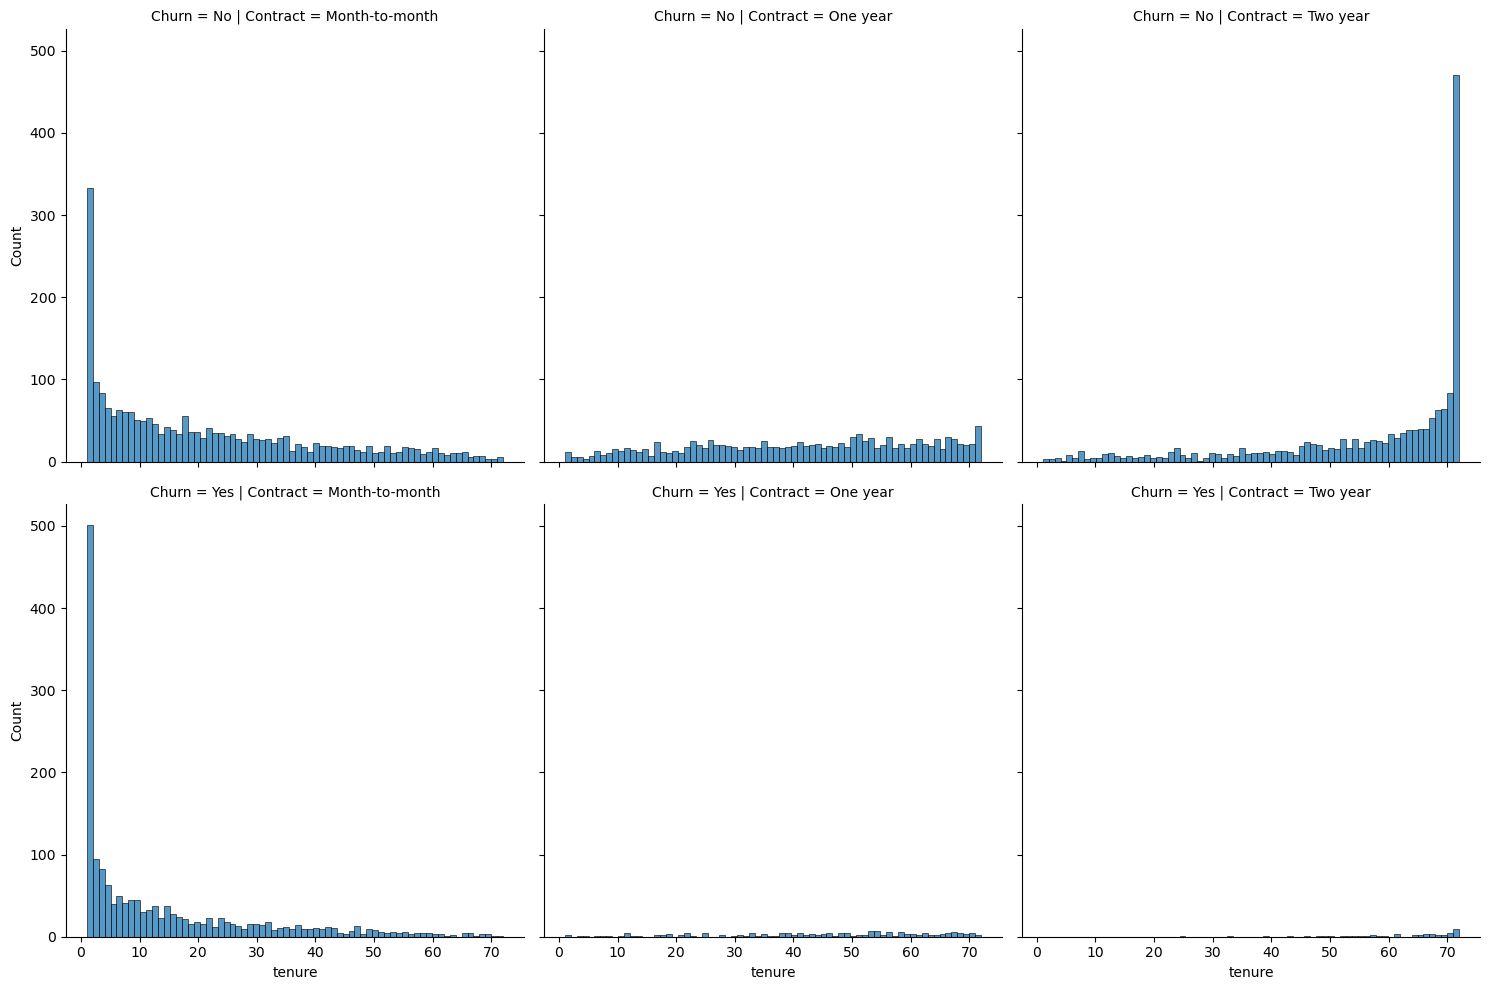

In [15]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df, x='tenure', col='Contract', row='Churn', bins=70)

Можем наблюдать, что большинстов клиентов уходят в отток на контракте Month-to-month, нежели на других.

---
Построим график scatterplot для колонок Total Charges и Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

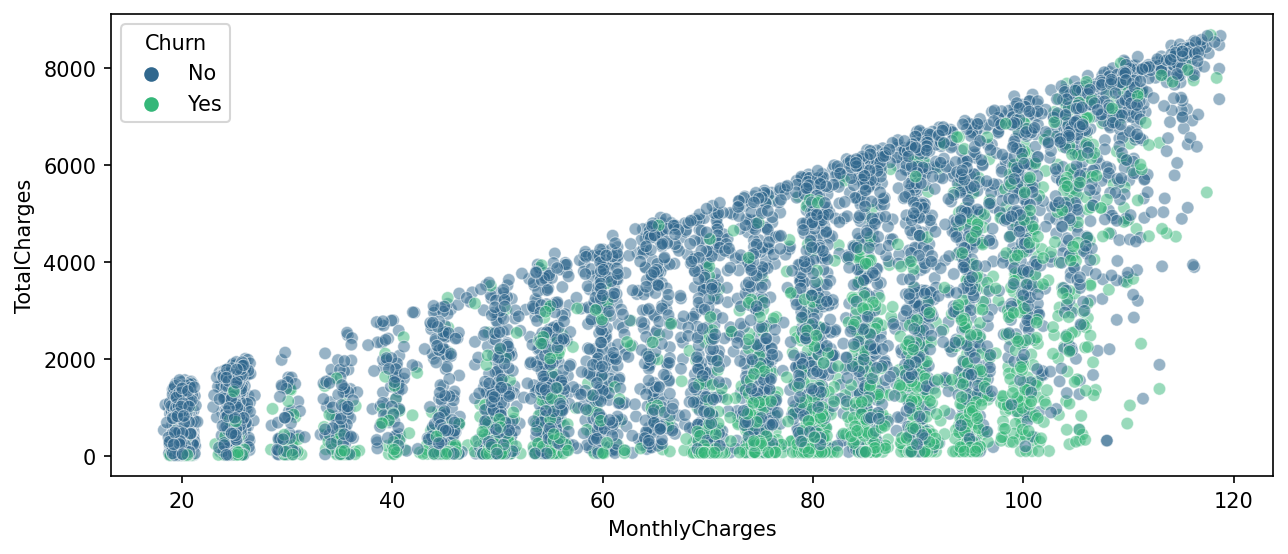

In [16]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='viridis', alpha=0.5)

И на этом графике мы видим, что большинство людей уходят в отток в связи с высокими ежемесячными тратами. Что логично, чем больше ежемесячные расходы, тем больше причин у человека искать более выгодные тарифы у конкурентов.

### Создание когорт (сегментов) по колонке Tenure

Когорта – это группа пользователей, имеющих общее свойство, которое определяется с помощью выбранных параметров.

Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).

Для каждого уникального значения колонки tenure в качестве когорты, вычислим процент оттока.

In [17]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [18]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [19]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Используя результаты churn_rate, построим график процента оттока для различных значений tenure.

<AxesSubplot:xlabel='tenure'>

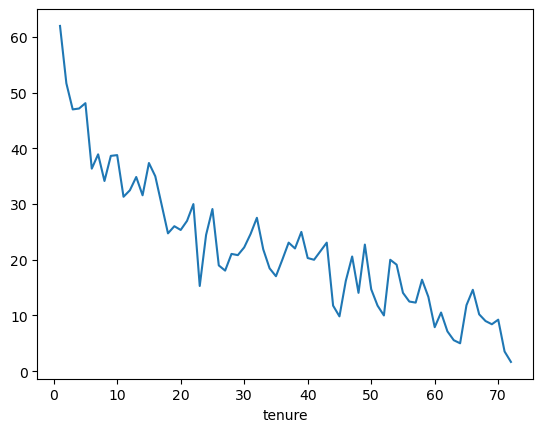

In [20]:
churn_rate.transpose()['customerID'].plot()

На графике мы видим, что чем больше человек пользуется тарифом, тем меньше вероятность ухода клиента.

---
Создадим  более крупные когорты для разбивания на категории:
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'  

In [21]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [22]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [23]:
df.head(10)[['tenure','Tenure Cohort']]


,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


Построим график scatterplot для Total Charges и Monthly Charts, и раскрасим график разными цветами по колонке "Tenure Cohort", которую мы только что создали.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

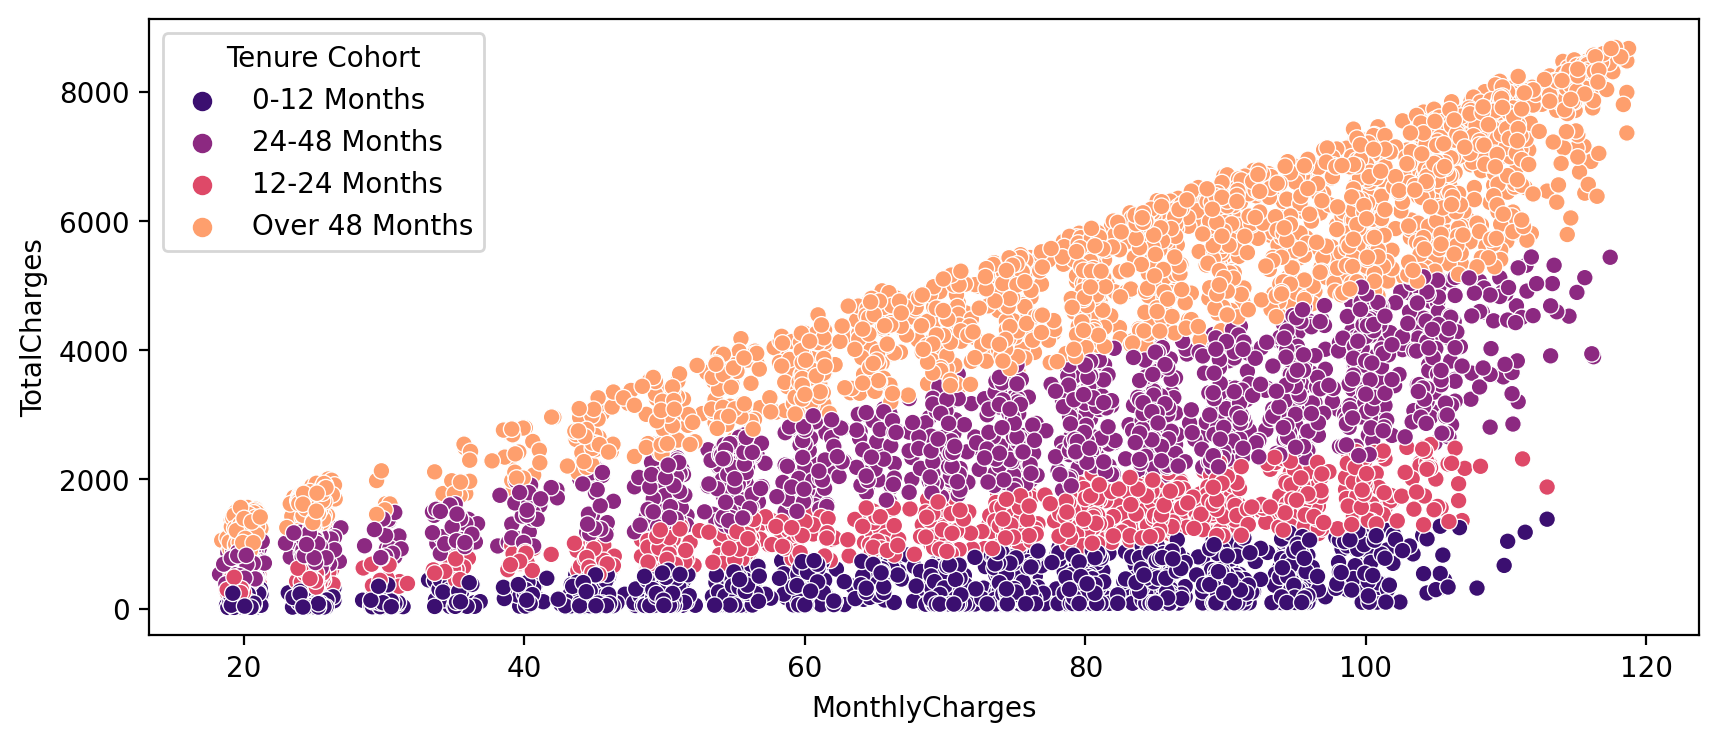

In [24]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', palette='magma')

В итоге мы наблюдаем логичный график, который показывает, что чем больше клиент является абонентом, тем больше у него общие траты.

---
Взглянем на график с количеством ушедших и не ушедших в отток людей в каждой когорте.

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

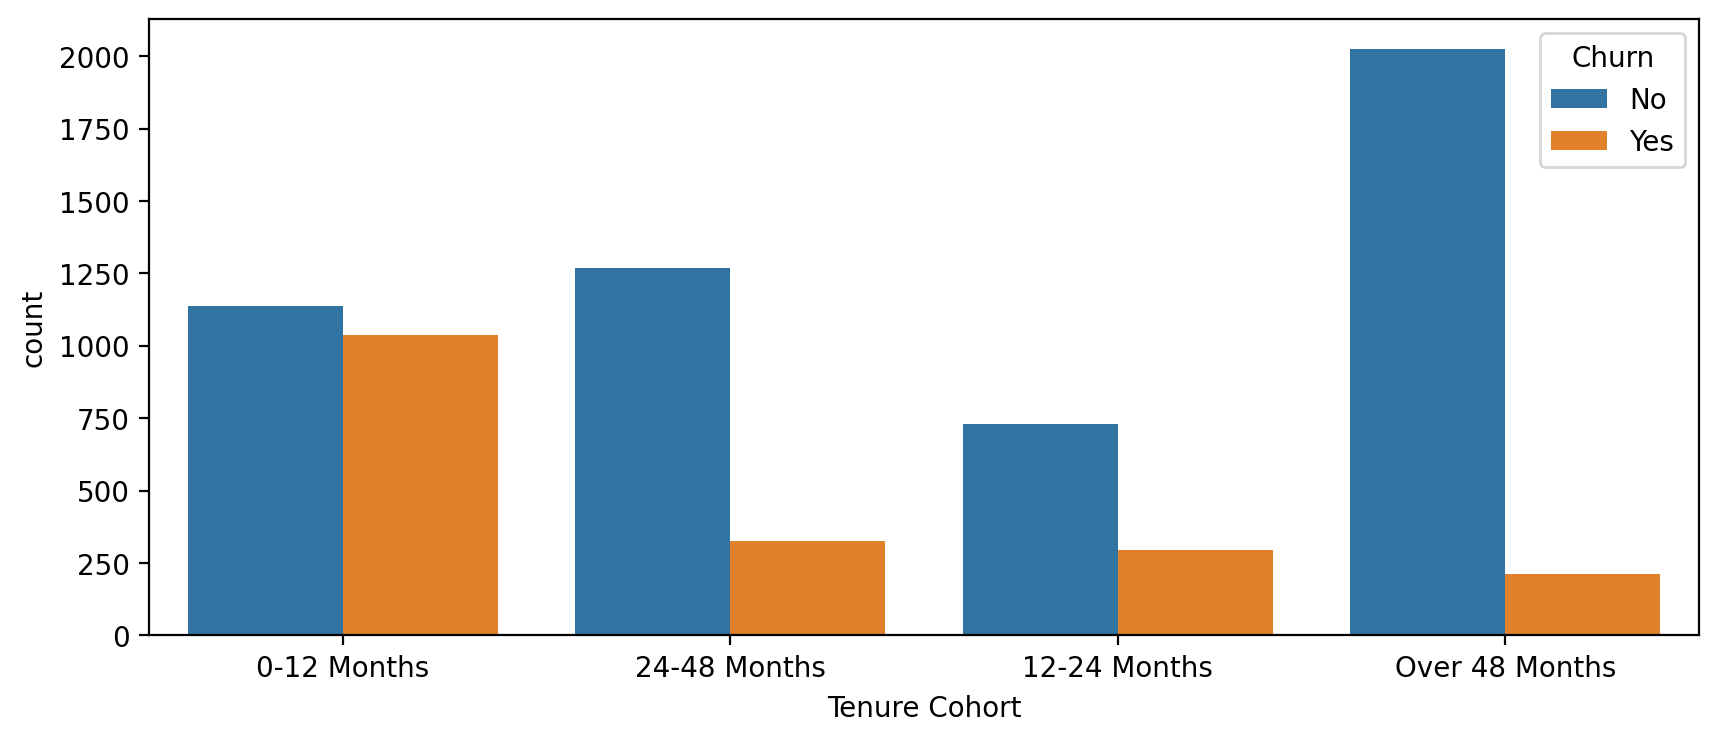

In [25]:
plt.figure(figsize=(10, 4), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

### Вывод
Были проанализированны данные, созданы когорты, для лучшего представления данных. Пропуски не были обнаружены. 
Можем приступать к подготовке признаков

## Задача:
Перед нами стоит задача классификации - необходимо определить - уйдет ли клиент или нет. Таким образом, для достижения целей данной задачи предлагаю использовать алгоритмы К-ближайших соседей, Случайного леса, AdaBoost  и Метод ближайших векторов.

Для оценки моделей будем использовать F1 score


### Подготовка признаков
Удалим лишние столбцы, переведем категориальные признаки в dummy переменные и разобьем на признаки и целевую переменную наши данные

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.84375,29.84375,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.93750,1890.00000,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.84375,108.12500,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.31250,1841.00000,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.68750,151.62500,Yes,0-12 Months


In [27]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

y = pd.get_dummies(df['Churn'],drop_first=True)

Разделим данные на обучающую выборку, валидационную для подбора гиперпараметров и тестовую, на которой мы проверим нашу модель. Тестовую выборку до конца трогать не будем, на ней отработаем лучшую модель.

Для начала получим валидационную выборку 20% и оставшиеся 80% разделим еще раз для получения тестовой выборки. Обучение будем проводить на 60% данных.

In [28]:
X_df, X_valid, y_df, y_valid = ( 
                                train_test_split(
                                X, y, test_size=0.20, random_state=107)
)

In [29]:
X_train, X_test, y_train, y_test = ( 
                                train_test_split(
                                X_df, y_df, test_size=0.25, random_state=107)
)

In [30]:
print('Количество образцов обучающей выборки:', len(X_train))
print('Количество образцов валидационной выборки:', len(X_valid))
print('Количество образцов тестовой выборки:', len(X_test))
print('Сумма выборок:', len(X_train) + len(X_test) + len(X_valid))
print()
print('Количество образцов подготовленной выборки (контрольная сумма):', len(df))

Количество образцов обучающей выборки: 4218
Количество образцов валидационной выборки: 1407
Количество образцов тестовой выборки: 1407
Сумма выборок: 7032

Количество образцов подготовленной выборки (контрольная сумма): 7032


Выборку разделили, можем переходить к пробному обучению моделей. Посмотрим на результаты, оценивать модели будем по F1 мере - она является хорошим кандидатом на формальную метрику оценки качества классификатора. Она сводит к одному числу две других основополагающих метрики: точность и полноту (precision и recall)

## Масштабирование
Масштабировать признаки на всем датасете может привести к утечке данных. Обучать scaler нужно только на трейне.

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Применим на валидационнуб выборку scaler, обученный на трейне.

In [32]:
X_valid = scaler.transform(X_valid)

Применим на тестовую выборку scaler, обученный на трейне.

In [33]:
X_test = scaler.transform(X_test)

## Обучение моделей.

###  K-ближайших соседей

Начнем с K-ближайших соседей.

In [34]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.5409153952843273


Можем наблюдать достаточно средний показатель F1-меры. Учитывая, что у нас наблюдается некоторый дисбаланс классов, можно было бы применить class_weight, но у K-ближайших соседей такого параметра нету. На данном этапе подбирать гиперпараметры не будем, перейдем к следующему алгоритму

### Метод опорных векторов

In [35]:
model = SVC()
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.5591397849462365


Метод опорных векторов немного лучше справился в условиях дисбаланса классов. Попробуем установить параметр class_weight

In [36]:
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.6362672322375398


Показатель улучшился, также сейчас не будем менять гиперпараметры, вернем к этому после того, как посмотрим на все алгоритмы.

### Случайный лес

In [37]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.56071964017991


Показатель приблежен к алгоритму K-ближайших соседей, посмотрим что будет, если установим параметр class_weight

In [38]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.540625


Показатель почти не изменился, перейдем к последнему расматриваему алгоритму.

### AdaBoost

In [39]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.60545193687231


Алгоритм показывает пока хороший относительно остальных показатель. Параметр class_weight так же как и в алгоритме K-ближайших соседей отсутствует.

## Обучение моделей и настройка гиперпараметров
Обучать модели будем на трейн выборке, проверять параметры будем на валидационной выборке и оценивать по F1-мере. 
Параметры будем подбирать черезе GridSearchCV.

###  K-ближайших соседей

In [40]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Поиск по сетке предложил нам n_neighbors - 18. Создадим модель с такими гипермараметрами и посмотрим на результат.

In [41]:
scaler = StandardScaler()
knn18 = KNeighborsClassifier(n_neighbors=18)
operations = [('scaler',scaler),('knn18',knn18)]

pipe = Pipeline(operations)
pipe.fit(X_train,y_train)
pipe_pred = pipe.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.60545193687231


Модель показала себя лучше. Чем без поиска по сетке параметров.

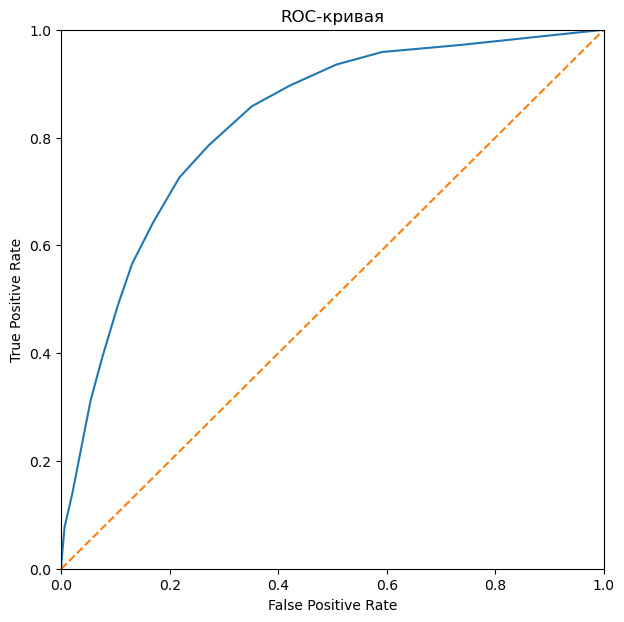

AUC: 0.8261045244971372


In [42]:
probabilities_valid = knn18.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid) 

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print("AUC:", auc_roc)

AUC больше 0.5, наша модель лучше случайной.

### Метод опорных векторов

In [43]:
model_svm = SVC()

param_grid = {'C':[0.1, 0.25, 0.5, 0.75, 1, 1.5],'kernel':['linear','rbf']}
grid = GridSearchCV(model_svm,param_grid)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 0.5, 'kernel': 'rbf'}

Получили параметры, теперь используем их.

In [44]:
model_svm = SVC(C=0.5, kernel='rbf', class_weight='balanced', probability=True)
model_svm.fit(X_train, y_train)
predicted_valid = model_svm.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.6421052631578947


Проведем на тест выборке и посмотрим как ведет себя модель на данных, которых не видела.

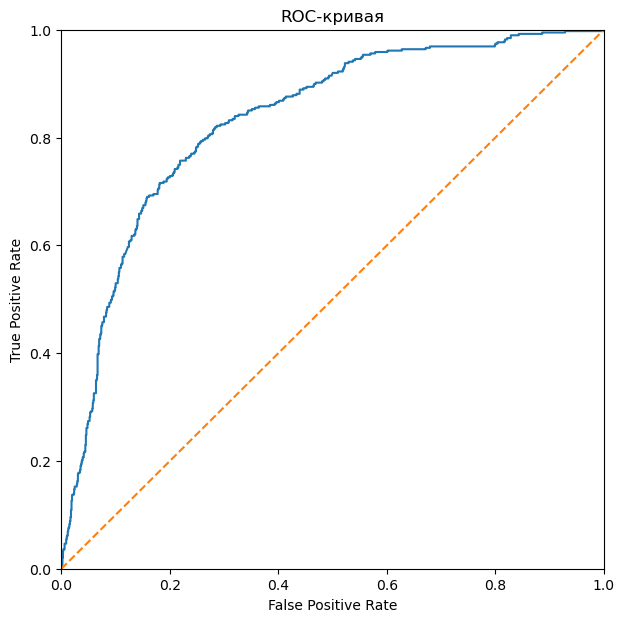

AUC: 0.831192683791863


In [45]:
probabilities_valid = model_svm.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid) 

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print("AUC:", auc_roc)

AUC больше 0.5, наша модель лучше случайной и так же лучше K-ближайших соседей.

### Случайный лес

In [46]:
param_grid = {'n_estimators': [30, 50, 75,100],
             'max_features': [2,3,4],
             'bootstrap':[True,False],
             'oob_score':[True,False],
             'class_weight': [None, 'balanced']} 

model = RandomForestClassifier(random_state=107)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=107),
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [30, 50, 75, 100],
                         'oob_score': [True, False]},
             scoring='accuracy')

In [47]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': None,
 'max_features': 4,
 'n_estimators': 75,
 'oob_score': True}

Мы получили параметры, создадим модель

In [48]:
model_random_for = RandomForestClassifier(n_estimators=75, \
                               class_weight=None, \
                               max_features=4, \
                               oob_score=True, \
                               bootstrap=True)

model_random_for.fit(X_train, y_train)
predicted_valid = model_random_for.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.562874251497006


Алгоритм показал себя хуже остальных. Посмотрим как он ведет себя на незнакомых данных.

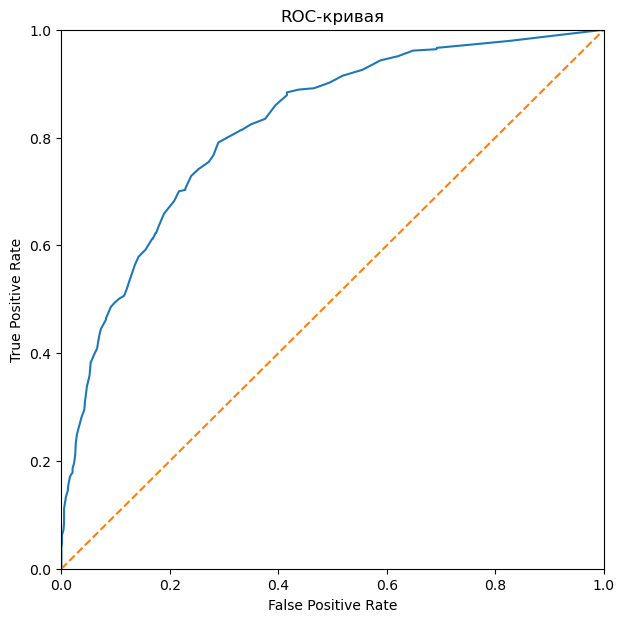

AUC: 0.8191163804022901


In [49]:
probabilities_valid = model_random_for.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid) 

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print("AUC:", auc_roc)

AUC больше 0.5, наша модель лучше случайной, но не лучше остальных алгоритмов.

### AdaBoost

Попробуем настроить AdaBoost с применением кроссвалидации. Получим базовую модель, проверять будем по F1-мере.

In [50]:
param_grid = {'n_estimators': [30, 50, 65, 75],
             'algorithm': ['SAMME', 'SAMME.R']} 

model = AdaBoostClassifier(random_state=107)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=107),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [30, 50, 65, 75]},
             scoring='accuracy')

In [51]:
grid_search.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 65}

Настроим модель с полученными гиперпараметрами.

In [52]:
model_adaboost = AdaBoostClassifier(n_estimators=65, algorithm="SAMME.R")

model_adaboost.fit(X_train, y_train)
predicted_valid = model_adaboost.predict(X_valid)
print(f1_score(y_valid, predicted_valid))

0.6085714285714285


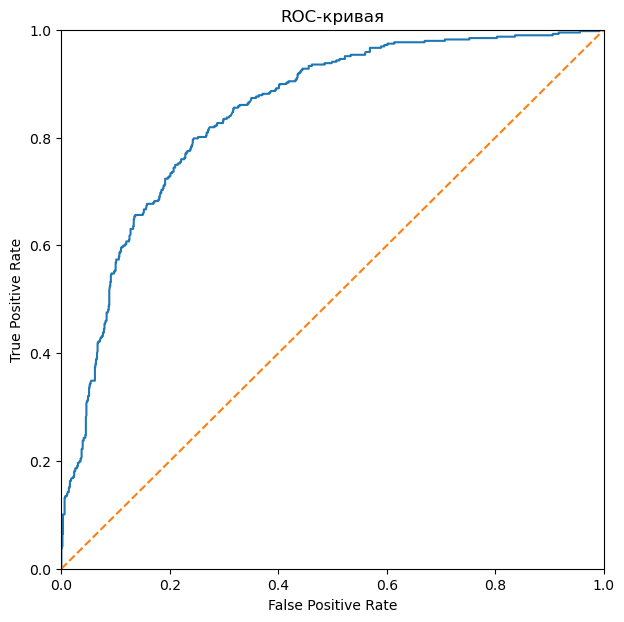

AUC: 0.844391244870041


In [53]:
probabilities_valid = model_adaboost.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid) 

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)

print("AUC:", auc_roc)

AUC больше 0.5, наша модель лучше случайной и так же показывает результат лучше других алгоритмов.

## Тестирование моделей и проверка адекватности модели

In [54]:
#для удобства вывода в дальнейшем - соберем показатели в списки

model = []
prec = []
acc = []

### K-ближайших соседей

In [55]:
predictions_test = pipe.predict(X_test)
test_f1 = f1_score(y_test, predictions_test)
test_acc = accuracy_score(y_test, predictions_test)

print("Accuracy")
print("Тестовая выборка:", test_acc)
print("F1-мера")
print("Тестовая выборка:", test_f1)

acc.append(round(test_acc, 2))
prec.append(round(test_f1, 2))
model.append('k-nearest_neighbors')

Accuracy
Тестовая выборка: 0.7931769722814499
F1-мера
Тестовая выборка: 0.5701624815361891


### Метод опорных векторов

In [56]:
predictions_test = model_svm.predict(X_test)
test_f1 = f1_score(y_test, predictions_test)
test_acc = accuracy_score(y_test, predictions_test)

print("Accuracy")
print("Тестовая выборка:", test_acc)
print("F1-мера")
print("Тестовая выборка:", test_f1)

acc.append(round(test_acc, 2))
prec.append(round(test_f1, 2))
model.append('SVM')

Accuracy
Тестовая выборка: 0.744136460554371
F1-мера
Тестовая выборка: 0.6303901437371664


### Cлучайные леса

In [57]:
predictions_test = model_random_for.predict(X_test)
test_f1 = f1_score(y_test, predictions_test)
test_acc = accuracy_score(y_test, predictions_test)

print("Accuracy")
print("Тестовая выборка:", test_acc)
print("F1-мера")
print("Тестовая выборка:", test_f1)

acc.append(round(test_acc, 2))
prec.append(round(test_f1, 2))
model.append('Random_forests')

Accuracy
Тестовая выборка: 0.7882018479033405
F1-мера
Тестовая выборка: 0.5538922155688623


### AdaBoost

In [58]:
predictions_test = model_adaboost.predict(X_test)
test_f1 = f1_score(y_test, predictions_test)
test_acc = accuracy_score(y_test, predictions_test)

print("Accuracy")
print("Тестовая выборка:", test_acc)
print("F1-мера")
print("Тестовая выборка:", test_f1)

acc.append(round(test_acc, 2))
prec.append(round(test_f1, 2))
model.append('AdaBoost')

Accuracy
Тестовая выборка: 0.8052594171997157
F1-мера
Тестовая выборка: 0.6051873198847262


### Вывод

Для удобства выведем таблицу наших параметров по моделям:

In [59]:
table_of_models = (pd.DataFrame({'Model':model, 'Accuracy':acc, 
                                'F1 score':prec}).sort_values(by='F1 score', ascending=False).
                  reset_index(drop=True))

table_of_models

,Model,Accuracy,F1 score
0,SVM,0.74,0.63
1,AdaBoost,0.81,0.61
2,k-nearest_neighbors,0.79,0.57
3,Random_forests,0.79,0.55


Наилучший результат получили на Методе Опорных Векторов - 0.63, второе место занимает AdaBoost. Cлучайные леса и К-ближайших соседей не преодолели значение F1-меры 0.60



### Проверка адекватности моделей

Сравним наши модели с константной моделью: любому объекту она прогнозирует класс «0»

In [60]:
target_const = y*0
acc_const = accuracy_score(y, target_const)


print("Accuracy")
print("Константа:", acc_const)

Accuracy
Константа: 0.7342150170648464


Все четыре модели прошли проверку на адекватность. 

## Вывод
Нам были предоставлены исторические данные о поведении клиентов и отказ от абонентского обслуживания. На основе этих данных мы сформировали признаки для обучения модели с целью прогнозирования оттока клиентов. Лучших результатов мы достигли с моделью на основе алгоритма Метода Опорных Векторов - F1 мера - 0.63.

Для предсказания оттока клиентов можно использовать Методе Опорных Векторов.